In [131]:
import numpy as np
import pandas as pd

In [132]:
data = pd.read_csv("data/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [133]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [134]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [135]:
train_set.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.565121,35.631252,28.592720,2635.515928,538.923420,1428.123123,500.259993,3.863585,206111.152980
std,1.999323,2.133670,12.618367,2142.925654,418.202807,1134.043862,379.273307,1.907402,114790.075691
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.780000,33.940000,18.000000,1454.750000,296.000000,788.000000,280.000000,2.561150,119400.000000
50%,-118.490000,34.250000,29.000000,2129.000000,437.000000,1169.000000,411.000000,3.524600,179200.000000
75%,-118.010000,37.720000,37.000000,3152.250000,648.000000,1726.000000,606.000000,4.727000,263800.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


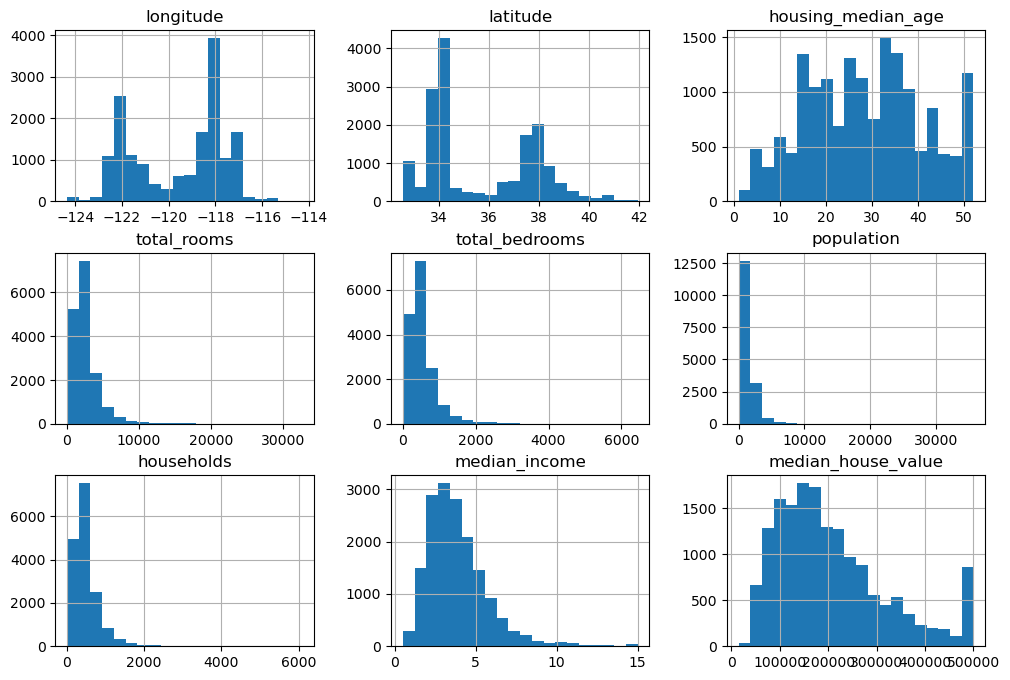

In [136]:
import matplotlib.pyplot as plt

train_set.hist(bins=20, figsize=(12, 8))
plt.show()

In [137]:
def preprocessing(pd_data):
    #remove columns
    pd_data = pd_data.drop(columns= ['ocean_proximity'])
    pd_data=(pd_data-pd_data.mean())/pd_data.std()
    pd_data['total_bedrooms'].fillna((pd_data['total_bedrooms'].mean()), inplace=True)
    return pd_data.drop(columns= ['median_house_value']), pd_data['median_house_value']

preprocessing(train_set)[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [138]:
import statsmodels.api as sm
from patsy import dmatrix

train_X, train_Y = preprocessing(train_set)
test_X, test_Y = preprocessing(test_set)


In [139]:
def prepare_data(data):
    # we now fit a GAM to predict wage using natural spline functions of year and age, treating education as a qualitative (i.e. categorical) predictor.
    longitude = dmatrix("cr(longitude, df=3)", {"longitude": data['longitude']}, return_type='dataframe')
    latitude = dmatrix("cr(latitude, df=3)", {"latitude": data['latitude']}, return_type='dataframe')
    housing_median_age = dmatrix("cr(housing_median_age, df=3)", {"housing_median_age": data['housing_median_age']}, return_type='dataframe')
    total_rooms = dmatrix("cr(total_rooms, df=3)", {"total_rooms": data['total_rooms']}, return_type='dataframe')
    total_bedrooms = dmatrix("cr(total_bedrooms, df=3)", {"total_bedrooms": data['total_bedrooms']}, return_type='dataframe')
    population = dmatrix("cr(population, df=3)", {"population": data['population']}, return_type='dataframe')
    households = dmatrix("cr(households, df=3)", {"households": data['households']}, return_type='dataframe')
    median_income = dmatrix("cr(median_income, df=3)", {"median_income": data['median_income']}, return_type='dataframe')

    # we concatenate all the predictors
    x_all = pd.concat([longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income], axis=1)
    return x_all

In [140]:
x_all = prepare_data(train_X)
x_all

,Intercept,"cr(longitude, df=3)[0]","cr(longitude, df=3)[1]","cr(longitude, df=3)[2]",Intercept,"cr(latitude, df=3)[0]","cr(latitude, df=3)[1]","cr(latitude, df=3)[2]",Intercept,"cr(housing_median_age, df=3)[0]",...,"cr(population, df=3)[1]","cr(population, df=3)[2]",Intercept,"cr(households, df=3)[0]","cr(households, df=3)[1]","cr(households, df=3)[2]",Intercept,"cr(median_income, df=3)[0]","cr(median_income, df=3)[1]","cr(median_income, df=3)[2]"
14196,1.0,-0.121006,0.761052,0.359954,1.0,0.941622,0.068345,-0.009967,1.0,-0.088541,...,1.384656,0.001981,1.0,-0.203836,1.195853,0.007983,1.0,-0.192501,1.168021,0.024480
8267,1.0,-0.118892,0.722080,0.396812,1.0,0.958293,0.048834,-0.007127,1.0,0.569815,...,0.381801,-0.000462,1.0,0.792713,0.209435,-0.002149,1.0,-0.206836,1.179598,0.027239
17445,1.0,0.467194,0.603205,-0.070399,1.0,-0.070214,0.981010,0.089204,1.0,-0.026867,...,1.532683,0.003219,1.0,-0.522007,1.487242,0.034765,1.0,0.002039,0.998123,-0.000162
14265,1.0,0.364169,0.711022,-0.075191,1.0,-0.028982,1.001556,0.027427,1.0,0.031956,...,1.155644,0.000601,1.0,0.218319,0.785381,-0.003700,1.0,-0.291737,1.244137,0.047599
2271,1.0,-0.088306,0.471696,0.616610,1.0,0.784353,0.251609,-0.035962,1.0,0.662034,...,0.033084,-0.000046,1.0,0.971210,0.029100,-0.000309,1.0,0.666496,0.342082,-0.008578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.0,0.490934,0.577679,-0.068613,1.0,-0.082751,0.964488,0.118262,1.0,-0.029005,...,0.327739,-0.000413,1.0,0.757969,0.244506,-0.002475,1.0,0.718101,0.289342,-0.007443
11964,1.0,-0.103703,0.943021,0.160682,1.0,0.631172,0.427123,-0.058296,1.0,-0.092593,...,0.400329,-0.000477,1.0,0.614069,0.389561,-0.003630,1.0,-0.456739,1.331216,0.125522
5390,1.0,-0.041693,1.003431,0.038262,1.0,0.100567,0.951393,-0.051960,1.0,0.315591,...,0.586940,-0.000554,1.0,0.366033,0.638377,-0.004409,1.0,0.449964,0.561782,-0.011747
860,1.0,-0.120753,0.755049,0.365705,1.0,0.581537,0.482927,-0.064464,1.0,0.110218,...,0.846117,-0.000357,1.0,0.396333,0.608094,-0.004427,1.0,0.285576,0.725885,-0.011461


In [141]:
# fit a model and print the summary
gam1_fit = sm.OLS(train_Y, x_all).fit()
print(gam1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1953.
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:10:31   Log-Likelihood:                -14654.
No. Observations:               16512   AIC:                         2.934e+04
Df Residuals:                   16495   BIC:                         2.947e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [142]:
pred = gam1_fit.predict(prepare_data(test_X))

In [143]:
from sklearn.metrics import r2_score
r2_score(test_Y, pred)

0.6424081268070501

In [152]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_Y, pred)**0.5
rmse

0.5979174251137659

In [148]:
gam1_fit.params

Intercept                          2.044381e+10
cr(longitude, df=3)[0]             8.590289e+09
cr(longitude, df=3)[1]             8.590289e+09
cr(longitude, df=3)[2]             8.590289e+09
Intercept                          2.696203e+10
cr(latitude, df=3)[0]              8.513610e+09
cr(latitude, df=3)[1]              8.513610e+09
cr(latitude, df=3)[2]              8.513610e+09
Intercept                         -1.229411e+10
cr(housing_median_age, df=3)[0]    1.015470e+10
cr(housing_median_age, df=3)[1]    1.015470e+10
cr(housing_median_age, df=3)[2]    1.015470e+10
Intercept                         -1.232491e+10
cr(total_rooms, df=3)[0]           7.968657e+09
cr(total_rooms, df=3)[1]           7.968657e+09
cr(total_rooms, df=3)[2]           7.968657e+09
Intercept                         -2.275950e+10
cr(total_bedrooms, df=3)[0]        9.239629e+09
cr(total_bedrooms, df=3)[1]        9.239629e+09
cr(total_bedrooms, df=3)[2]        9.239629e+09
Intercept                         -2.275

In [149]:
import matplotlib.pyplot as plt
x = np.linspace(-124, -114, 1000)
Hours_Studied = dmatrix("cr(x, df=3)", {"x": x})
b = np.array([ 24804.644726, 369623.903561, 55792.711146, -400611.969981])


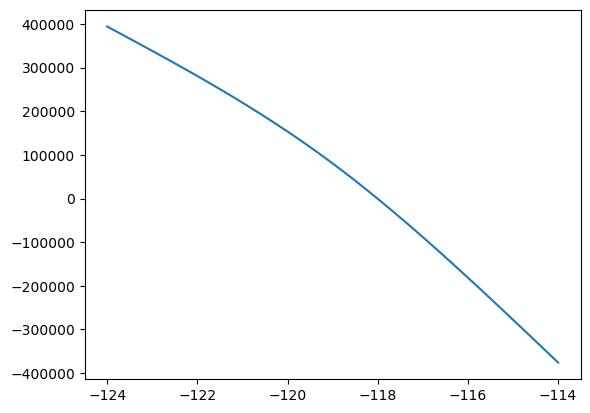

In [150]:
plt.plot(x, np.dot(Hours_Studied, b))

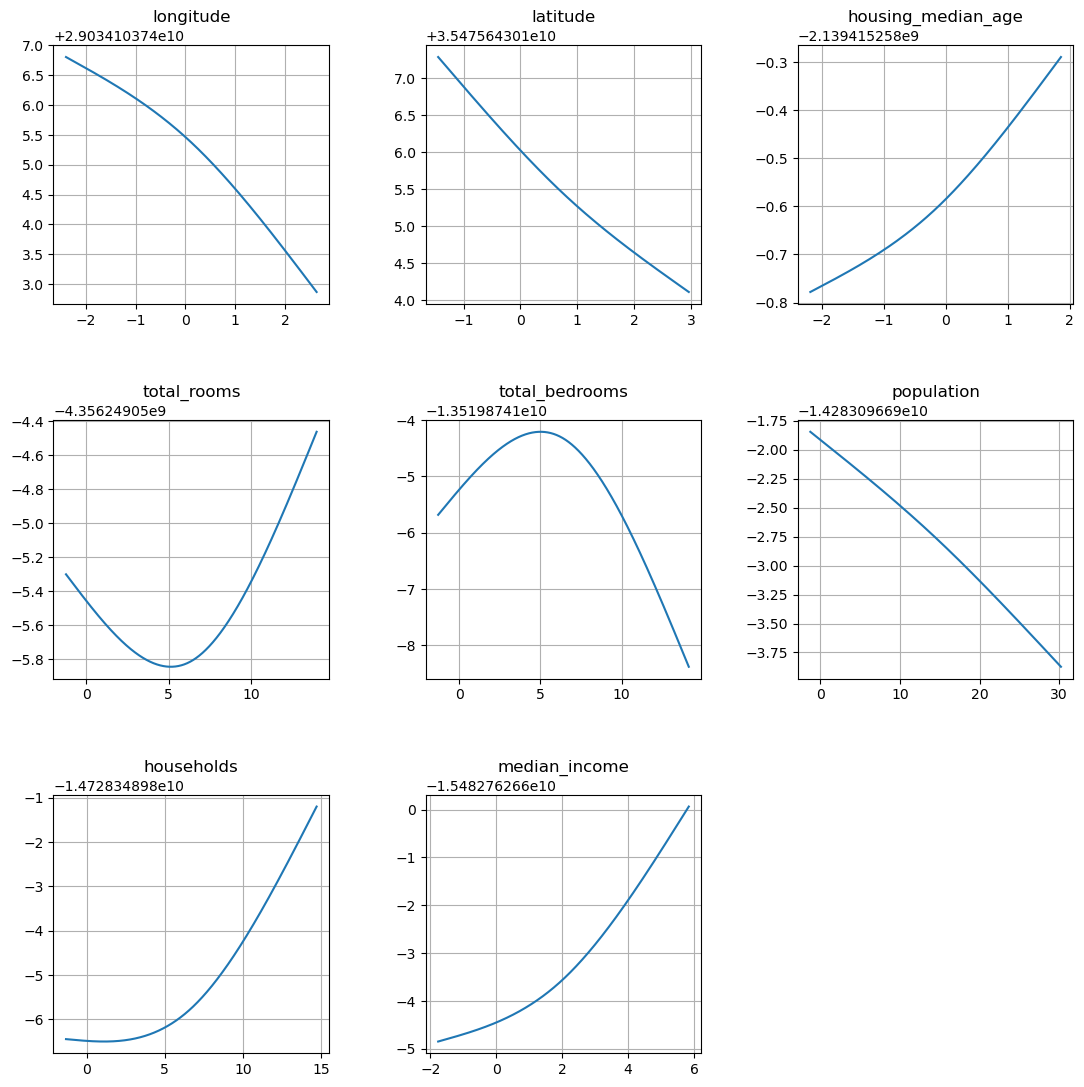

In [151]:
df = 3
plt.figure(figsize=(12, 12)) 
for i in range(len(gam1_fit.params)//(df+1)):
    coef = []
    for j in range(df+1):
        coef.append(gam1_fit.params[i*(df+1)+j])
    x = np.linspace(train_X.iloc[:, i].min(), train_X.iloc[:, i].max(), 1000)
    fx = dmatrix("cr(x, df=3)", {"x": x})
    coef = np.array(coef)
    
    plt.subplot(3, 3, i+1)
    plt.plot(x, np.dot(fx, coef))
    plt.title(train_X.columns[i])
    plt.grid(True)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.35)